In [297]:
import numpy
import numpy.random as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
sns.set()

In [267]:
sns.set_palette(sns.color_palette("hls", 20))

In [141]:
parr = numpy.exp(numpy.arange(-20, -5))
narr = numpy.exp(numpy.arange(15, 35))
threshold = numpy.arange(2, 20)

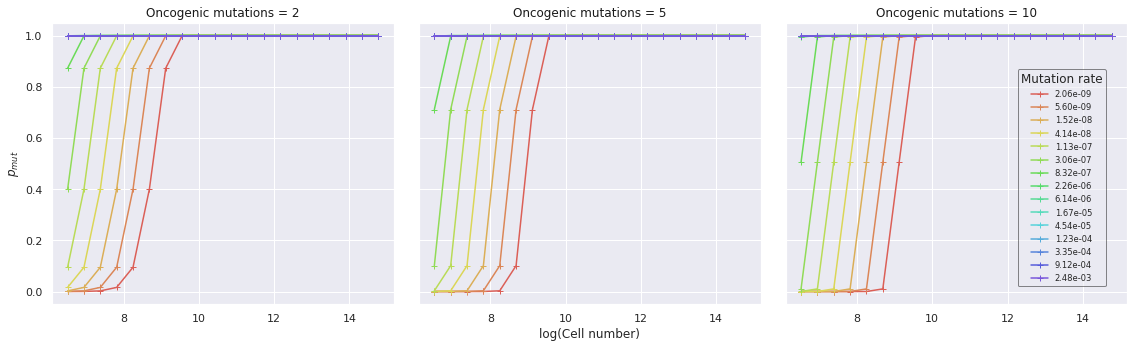

In [268]:
fig, axarr = plt.subplots(1, 3, figsize=(16,5), sharey=True)
# plt.xscale('log')

for ax, t in zip(axarr, [2, 5, 10]):
    for i, l in zip(parr, parr):
        ax.plot(numpy.log10(narr), (1-(1-i)**narr)**t, '+-', label=numpy.format_float_scientific(l, precision=2))
        ax.set_title('Oncogenic mutations = '+ str(t), color='k')

axarr[1].set_xlabel('log(Cell number)')
axarr[0].set_ylabel(r'$p_{mut}$')
plt.legend(fontsize='x-small', title='Mutation rate', bbox_to_anchor=(0.95, 0.85), edgecolor='k', framealpha=0.5)
plt.tight_layout()
plt.savefig('/home/iiser/PhD/github-cancer-incidence-models/all-figures/random-model-figures/mutation-probability.svg')

## POPULATION SIMULATION

In [296]:
Npop = 10000
parr = numpy.exp(numpy.arange(-24, -14)) #Mutation rate
narr = numpy.exp(numpy.arange(14, 25)) #Cell number
threshold = 5 #Mutation threshold for cancer
n = narr[8] #Carrying capacity
p = parr[8] #Mutation rate

ndiv = 365
age = 80 #Lifespan
time = ndiv*age #Duration of the simulation

garr = np.normal(0.007, 0.05, time*(threshold+1))
d = 0.007/5 #Constant death rate
dfmut = numpy.zeros(2*Npop).reshape(2, Npop)

for i in tqdm(range(Npop)):
    m = numpy.zeros((threshold+1)*time).reshape(threshold+1, time)
    m[0, 0] = n
    n_mut = numpy.zeros(time, dtype=int) #Number of mutations
    
    for t in range(1, time):

        n_mut[t] = n_mut[t-1]
        m[:, t] = m[:, t-1]
        p_mut = 1-(1-p)**m[n_mut[t], t]

        g = garr[(threshold+1)*(t-1):(threshold+1)*t]

        if p_mut > np.random_sample(): #New mutant population
            n_mut[t] += 1
            m[n_mut[t], t] = 1.0
            p_mut = 1-((1-p)**m[n_mut[t], t])
            m[n_mut[t]-1, t] -= 1.0

        elif n_mut[t] < threshold: #Growth of existing mutant or normal population, as the case may be
            m[:, t] += ((m[:, t]*g*(n-m[:, t].sum())/n) - m[:, t]*d)
            p_mut = 1-(1-p)**m[n_mut[t] ,t]
            
        if n_mut[t] == threshold:
            break
    
#     dfmut[0, i] = numpy.max(n_mut)
#     dfmut[1, i] = numpy.min(numpy.where(n_mut == dfmut[0, i]))/ndiv

KeyboardInterrupt: 